In [13]:
def image_filtering(img, filter):
    
    kernel = np.ones((5,5),np.float32)/25
    dst = cv2.filter2D(img,-1,kernel)

    

    return dst

def gaussian(m, n, sig):
    
    gaussian_window = np.zeros([m,n])
    m = m//2
    n = n//2
    for x in range(-m, m+1):
        for y in range(-n, n+1):

            denumer = 2*np.pi*sig**2
            numer =  np.exp( ((x**2 + y**2)/(2*sig*sig)) *-1 )    
            gaussian_window[x+m,y+n] = numer/denumer
            
    return gaussian_window

In [14]:
import os
path = "E:\FYP\data\training_aperio\A03\frames\x40"
dir_list = os.listdir(r'E:\FYP\data\training_aperio\A03\frames\x40')
 
print("Files and directories in '", path, "' :")
 
# prints all files
print(dir_list)

Files and directories in ' E:\FYP\data	raining_aperio\A03rames@ ' :
['A03_00Aa.tiff', 'A03_00Ab.tiff', 'A03_00Ac.tiff', 'A03_00Ad.tiff', 'A03_00Ba.tiff', 'A03_00Bb.tiff', 'A03_00Bc.tiff', 'A03_00Bd.tiff', 'A03_00Ca.tiff', 'A03_00Cb.tiff', 'A03_00Cc.tiff', 'A03_00Cd.tiff', 'A03_00Da.tiff', 'A03_00Db.tiff', 'A03_00Dc.tiff', 'A03_00Dd.tiff', 'A03_01Aa.tiff', 'A03_01Ab.tiff', 'A03_01Ac.tiff', 'A03_01Ad.tiff', 'A03_01Ba.tiff', 'A03_01Bb.tiff', 'A03_01Bc.tiff', 'A03_01Bd.tiff', 'A03_01Ca.tiff', 'A03_01Cb.tiff', 'A03_01Cc.tiff', 'A03_01Cd.tiff', 'A03_01Da.tiff', 'A03_01Db.tiff', 'A03_01Dc.tiff', 'A03_01Dd.tiff', 'A03_02Aa.tiff', 'A03_02Ab.tiff', 'A03_02Ac.tiff', 'A03_02Ad.tiff', 'A03_02Ba.tiff', 'A03_02Bb.tiff', 'A03_02Bc.tiff', 'A03_02Bd.tiff', 'A03_02Ca.tiff', 'A03_02Cb.tiff', 'A03_02Cc.tiff', 'A03_02Cd.tiff', 'A03_02Da.tiff', 'A03_02Db.tiff', 'A03_02Dc.tiff', 'A03_02Dd.tiff', 'A03_03Aa.tiff', 'A03_03Ab.tiff', 'A03_03Ac.tiff', 'A03_03Ad.tiff', 'A03_03Ba.tiff', 'A03_03Bb.tiff', 'A03_03Bc.ti

In [15]:
def l_o_g(x, y, sigma):
    # Formatted this way for readability
    nom = ( (y**2)+(x**2)-2*(sigma**2) )
    denom = ( (2*math.pi*(sigma**6) ))
    expo = math.exp( -((x**2)+(y**2))/(2*(sigma**2)) )
    return nom*expo/denom

def create_log(sigma, size = 7):
    w = math.ceil(float(size)*float(sigma))

    if(w%2 == 0):
        w = w + 1

    l_o_g_mask = []

    w_range = int(math.floor(w/2))
    print("Going from " + str(-w_range) + " to " + str(w_range))
    for i in range_inc(-w_range, w_range):
        for j in range_inc(-w_range, w_range):
            l_o_g_mask.append(l_o_g(i,j,sigma))
    l_o_g_mask = np.array(l_o_g_mask)
    l_o_g_mask = l_o_g_mask.reshape(w,w)
    return l_o_g_mask

def convolve(image, mask):
    width = image.shape[1]
    height = image.shape[0]
    w_range = int(math.floor(mask.shape[0]/2))

    res_image = np.zeros((height, width))

    # Iterate over every pixel that can be covered by the mask
    for i in range(w_range,width-w_range):
        for j in range(w_range,height-w_range):
            # Then convolute with the mask 
            for k in range_inc(-w_range,w_range):
                for h in range_inc(-w_range,w_range):
                    res_image[j, i] += mask[w_range+h,w_range+k]*image[j+h,i+k]
    return res_image

def z_c_test(l_o_g_image):
    z_c_image = np.zeros(l_o_g_image.shape)

    # Check the sign (negative or positive) of all the pixels around each pixel
    for i in range(1,l_o_g_image.shape[0]-1):
        for j in range(1,l_o_g_image.shape[1]-1):
            neg_count = 0
            pos_count = 0
            for a in range_inc(-1, 1):
                for b in range_inc(-1,1):
                    if(a != 0 and b != 0):
                        if(l_o_g_image[i+a,j+b] < 0):
                            neg_count += 1
                        elif(l_o_g_image[i+a,j+b] > 0):
                            pos_count += 1

            # If all the signs around the pixel are the same and they're not all zero, then it's not a zero crossing and not an edge. 
            # Otherwise, copy it to the edge map.
            z_c = ( (neg_count > 0) and (pos_count > 0) )
            if(z_c):
                z_c_image[i,j] = 1

    return z_c_image


def run_l_o_g(bin_image, sigma_val, size_val):
    # Create the l_o_g mask
    print("creating mask")
    l_o_g_mask = create_log(sigma_val, size_val)

    # Smooth the image by convolving with the LoG mask
    print("smoothing")
    l_o_g_image = convolve(bin_image, l_o_g_mask)

    # Display the smoothed imgage
    blurred = fig.add_subplot(1,4,2)
    blurred.imshow(l_o_g_image, cmap=cm.gray)

    # Find the zero crossings
    print("finding zero crossings")
    z_c_image = z_c_test(l_o_g_image)
    print(z_c_image)

    #Display the zero crossings
    edges = fig.add_subplot(1,4,3)
    edges.imshow(z_c_image, cmap=cm.gray)
    pylab.show()

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt  

import os
path = "E:\FYP\data\training_aperio\A18\frames\x40"
dir_list = os.listdir(r'E:\FYP\data\training_aperio\A18\frames\x40')
dir_list

['A18_00Aa.tiff',
 'A18_00Ab.tiff',
 'A18_00Ac.tiff',
 'A18_00Ad.tiff',
 'A18_00Ba.tiff',
 'A18_00Bb.tiff',
 'A18_00Bc.tiff',
 'A18_00Bd.tiff',
 'A18_00Ca.tiff',
 'A18_00Cb.tiff',
 'A18_00Cc.tiff',
 'A18_00Cd.tiff',
 'A18_00Da.tiff',
 'A18_00Db.tiff',
 'A18_00Dc.tiff',
 'A18_00Dd.tiff',
 'A18_01Aa.tiff',
 'A18_01Ab.tiff',
 'A18_01Ac.tiff',
 'A18_01Ad.tiff',
 'A18_01Ba.tiff',
 'A18_01Bb.tiff',
 'A18_01Bc.tiff',
 'A18_01Bd.tiff',
 'A18_01Ca.tiff',
 'A18_01Cb.tiff',
 'A18_01Cc.tiff',
 'A18_01Cd.tiff',
 'A18_01Da.tiff',
 'A18_01Db.tiff',
 'A18_01Dc.tiff',
 'A18_01Dd.tiff',
 'A18_02Aa.tiff',
 'A18_02Ab.tiff',
 'A18_02Ac.tiff',
 'A18_02Ad.tiff',
 'A18_02Ba.tiff',
 'A18_02Bb.tiff',
 'A18_02Bc.tiff',
 'A18_02Bd.tiff',
 'A18_02Ca.tiff',
 'A18_02Cb.tiff',
 'A18_02Cc.tiff',
 'A18_02Cd.tiff',
 'A18_02Da.tiff',
 'A18_02Db.tiff',
 'A18_02Dc.tiff',
 'A18_02Dd.tiff',
 'A18_03Aa.tiff',
 'A18_03Ab.tiff',
 'A18_03Ac.tiff',
 'A18_03Ad.tiff',
 'A18_03Ba.tiff',
 'A18_03Bb.tiff',
 'A18_03Bc.tiff',
 'A18_03Bd

In [27]:
# organizing imports
import cv2
import numpy as np
# import matplotlib.pyplot as plt  

import os
path = "E:\FYP\data\training_hamamatsu\H18\frames\x40"
dir_list = os.listdir(r'E:\FYP\data\training_hamamatsu\H18\frames\x40')
dir_list

['H18_00Aa.tiff',
 'H18_00Ab.tiff',
 'H18_00Ac.tiff',
 'H18_00Ad.tiff',
 'H18_00Ba.tiff',
 'H18_00Bb.tiff',
 'H18_00Bc.tiff',
 'H18_00Bd.tiff',
 'H18_00Ca.tiff',
 'H18_00Cb.tiff',
 'H18_00Cc.tiff',
 'H18_00Cd.tiff',
 'H18_00Da.tiff',
 'H18_00Db.tiff',
 'H18_00Dc.tiff',
 'H18_00Dd.tiff',
 'H18_01Aa.tiff',
 'H18_01Ab.tiff',
 'H18_01Ac.tiff',
 'H18_01Ad.tiff',
 'H18_01Ba.tiff',
 'H18_01Bb.tiff',
 'H18_01Bc.tiff',
 'H18_01Bd.tiff',
 'H18_01Ca.tiff',
 'H18_01Cb.tiff',
 'H18_01Cc.tiff',
 'H18_01Cd.tiff',
 'H18_01Da.tiff',
 'H18_01Db.tiff',
 'H18_01Dc.tiff',
 'H18_01Dd.tiff',
 'H18_02Aa.tiff',
 'H18_02Ab.tiff',
 'H18_02Ac.tiff',
 'H18_02Ad.tiff',
 'H18_02Ba.tiff',
 'H18_02Bb.tiff',
 'H18_02Bc.tiff',
 'H18_02Bd.tiff',
 'H18_02Ca.tiff',
 'H18_02Cb.tiff',
 'H18_02Cc.tiff',
 'H18_02Cd.tiff',
 'H18_02Da.tiff',
 'H18_02Db.tiff',
 'H18_02Dc.tiff',
 'H18_02Dd.tiff',
 'H18_03Aa.tiff',
 'H18_03Ab.tiff',
 'H18_03Ac.tiff',
 'H18_03Ad.tiff',
 'H18_03Ba.tiff',
 'H18_03Bb.tiff',
 'H18_03Bc.tiff',
 'H18_03Bd

In [28]:
# import matplotlib.pyplot as plt
for i in dir_list:

#     image1 = cv2.imread(mg_path)
    print(i)
    
#     image1 = cv2.imread('x40\\'+ i)
   
    image1 = cv2.imread('H18\\frames\\x40\\'+ i)

    
    img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    ret, thresh1 = cv2.threshold(img,50, 200, cv2.THRESH_BINARY)
    source = cv2.GaussianBlur(thresh1, (7, 7), 0)

    dest = cv2.Laplacian(source, cv2.CV_16S, ksize=9)
    abs_dest = cv2.convertScaleAbs(dest)
#     plt.imshow(abs_dest)
#     plt.imshow(abs_dest)
#     print(os.chdir(r"C:\Users\ad\Downloads"))
#     print("A07Images" + str(img_path))
    
    cv2.imwrite(r'E:\FYP\data\training_hamamatsu\Hamamatsu_lcsegmented\lcH18x40\ ' +str(i) ,abs_dest)
    

H18_00Aa.tiff
H18_00Ab.tiff
H18_00Ac.tiff
H18_00Ad.tiff
H18_00Ba.tiff
H18_00Bb.tiff
H18_00Bc.tiff
H18_00Bd.tiff
H18_00Ca.tiff
H18_00Cb.tiff
H18_00Cc.tiff
H18_00Cd.tiff
H18_00Da.tiff
H18_00Db.tiff
H18_00Dc.tiff
H18_00Dd.tiff
H18_01Aa.tiff
H18_01Ab.tiff
H18_01Ac.tiff
H18_01Ad.tiff
H18_01Ba.tiff
H18_01Bb.tiff
H18_01Bc.tiff
H18_01Bd.tiff
H18_01Ca.tiff
H18_01Cb.tiff
H18_01Cc.tiff
H18_01Cd.tiff
H18_01Da.tiff
H18_01Db.tiff
H18_01Dc.tiff
H18_01Dd.tiff
H18_02Aa.tiff
H18_02Ab.tiff
H18_02Ac.tiff
H18_02Ad.tiff
H18_02Ba.tiff
H18_02Bb.tiff
H18_02Bc.tiff
H18_02Bd.tiff
H18_02Ca.tiff
H18_02Cb.tiff
H18_02Cc.tiff
H18_02Cd.tiff
H18_02Da.tiff
H18_02Db.tiff
H18_02Dc.tiff
H18_02Dd.tiff
H18_03Aa.tiff
H18_03Ab.tiff
H18_03Ac.tiff
H18_03Ad.tiff
H18_03Ba.tiff
H18_03Bb.tiff
H18_03Bc.tiff
H18_03Bd.tiff
H18_03Ca.tiff
H18_03Cb.tiff
H18_03Cc.tiff
H18_03Cd.tiff
H18_03Da.tiff
H18_03Db.tiff
H18_03Dc.tiff
H18_03Dd.tiff
H18_04Aa.tiff
H18_04Ab.tiff
H18_04Ac.tiff
H18_04Ad.tiff
H18_04Ba.tiff
H18_04Bb.tiff
H18_04Bc.tiff
H18_04

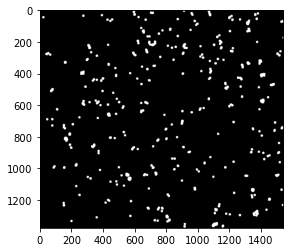

In [25]:
plt.imshow(abs_dest, cmap="gray" )

In [ ]:
cv2.imwrite('A:\images\output_images\messigray{}.png'.format(bb), c)

In [14]:


source = image1



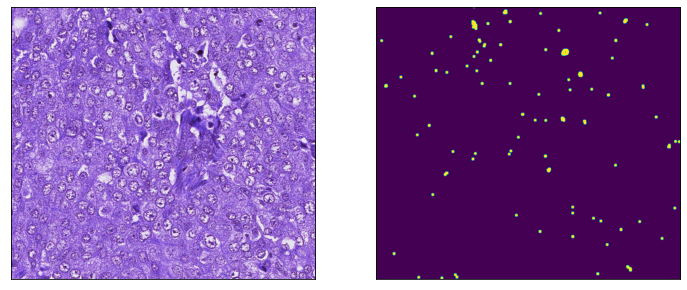

In [19]:
f, axarr = plt.subplots(1,2, figsize=(12, 12))

axarr[0].imshow(image1)

axarr[0].imshow(image1)
# axarr[0].imshow(thresh1, cmap='gray') #our image at the left side
axarr[1].imshow(abs_dest)
for ax in axarr:
    ax.set_xticks([])
    ax.set_yticks([])

In [ ]:
 cv2.imwrite(r'E:\FYP\data\training_aperio\cvsegmented\ ' +str(imgs).replace('.tiff','.jpg') ,cv[1])